## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import weightedstats as ws

from scipy import stats

%matplotlib inline
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [24, 12]
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', 200)

### Auxiliar Functions

In [2]:
def output_mode(series_data):
    mode = series_data.mode()
    size = mode.shape[0]
    
    if size == series_data.shape[0]:
        return 'No mode'
    elif size == 1:
        return mode
    elif size > 1:
        return mode[0]
    else: 
        return 'No mode'

## Data collection

In [3]:
data = pd.read_csv('data/state.csv')
data.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.70,AL
1,Alaska,710231,5.60,AK
2,Arizona,6392017,4.70,AZ
3,Arkansas,2915918,5.60,AR
4,California,37253956,4.40,CA


## Data Description

In [4]:
data.shape

(50, 4)

In [5]:
data.dtypes

State            object
Population        int64
Murder.Rate     float64
Abbreviation     object
dtype: object

In [6]:
data.isna().sum()

State           0
Population      0
Murder.Rate     0
Abbreviation    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [8]:
data.describe()

,Population,Murder.Rate
count,50.00,50.00
mean,6162876.30,4.07
std,6848235.35,1.92
min,563626.00,0.90
25%,1833004.25,2.42
50%,4436369.50,4.00
75%,6680312.25,5.55
max,37253956.00,10.30


## Showing Descriptive Statistics

### Central Tendency Metrics

Min | Max | Média | Mediana | Moda | Mediana Ponderada | Média Aparada | Média Ponderada |

In [9]:
# min
print(f"Min: {np.min(data['Population'])}")

# max
print(f"Max: {np.max(data['Population'])}")

# Média
print(f"Média: {np.mean(data['Population'])}")

# Mediana
print(f"Mediana: {np.median(data['Population'])}")

# Moda
print(f"Moda: {output_mode(data['Population'])}")

# Média Ponderada
print(f"Média Ponderada: {np.average(data['Population'], weights=data['Murder.Rate']):.2f}")

# Média Aparada
print(f"Média Aparada: {stats.trim_mean(data['Population'], proportiontocut=0.1)}")

# Mediana Ponderada
print(f"Mediana Ponderada: {ws.weighted_median(data['Population'], weights = data['Murder.Rate'])}")

Min: 563626
Max: 37253956
Média: 6162876.3
Mediana: 4436369.5
Moda: No mode
Média Ponderada: 6738594.41
Média Aparada: 4783697.125
Mediana Ponderada: 4625364


- Essas métricas de tendência central servem para indicar onde a maioria dos dados se encontra, seu ponto central, a partir do cálculo estatístico de valores únicos que representam todo o conjunto de dados.
- Interessante notar, por exemplo, que para a coluna 'Population' não há moda, todos os valores numéricos são distintos, a média aparada é significativamente menor da média convencional, indício de outliers e que a mediana ponderada ou a média aparada aparentam ser as melhores representações de um ponto central para estes dados.

### Dispersion  Metrics

Range | Interquantile Range | Quantis | Variability | Standard Deviation | Absolut Mean Deviation | Absolut Median Deviation |

In [10]:
# Range
min_population = data['Population'].min()
max_population = data['Population'].max()
print(f"Amplitude: {max_population - min_population}")

# Interquantile Range
quantil_25th = np.quantile(data['Population'], 0.25)
quantil_75th = np.quantile(data['Population'], 0.75)
print(f"Amplitude Interquartílica: {quantil_75th - quantil_25th}")

# Quantis
print(f"1° Quartil (25th): {np.quantile(data['Population'], 0.25)}")
print(f"3° Quartil (75th): {np.quantile(data['Population'], 0.75)}")

# Variability
print(f'Variability: {data["Population"].var():.2f}')

# Standard Deviation
print(f"Standard Deviation: {data['Population'].std():.2f}")

# Absolute Mean Deviation
print(f"Desvio Médio Absoluto: {data['Population'].mad():.2f}")

# Absolute Median Deviation
print(f"Desvio Mediano Absoluto: {stats.median_abs_deviation(data['Population'], scale='normal'):.2f}")

Amplitude: 36690330
Amplitude Interquartílica: 4847308.0
1° Quartil (25th): 1833004.25
3° Quartil (75th): 6680312.25
Variability: 46898327373394.45
Standard Deviation: 6848235.35
Desvio Médio Absoluto: 4450933.36
Desvio Mediano Absoluto: 3849876.15


- O desvio padrão pode ser comparado ao desvio mediano absoluto. Observe que o desvio mediano absoluto é menor que o desvio padrão. Isso ocorre porque o desvio padrão é sensível a outliers.

## Visualizing Distributions

- Boxplots
- Frequency Tables
- Histograms
- Scatter Plots

### Boxplots

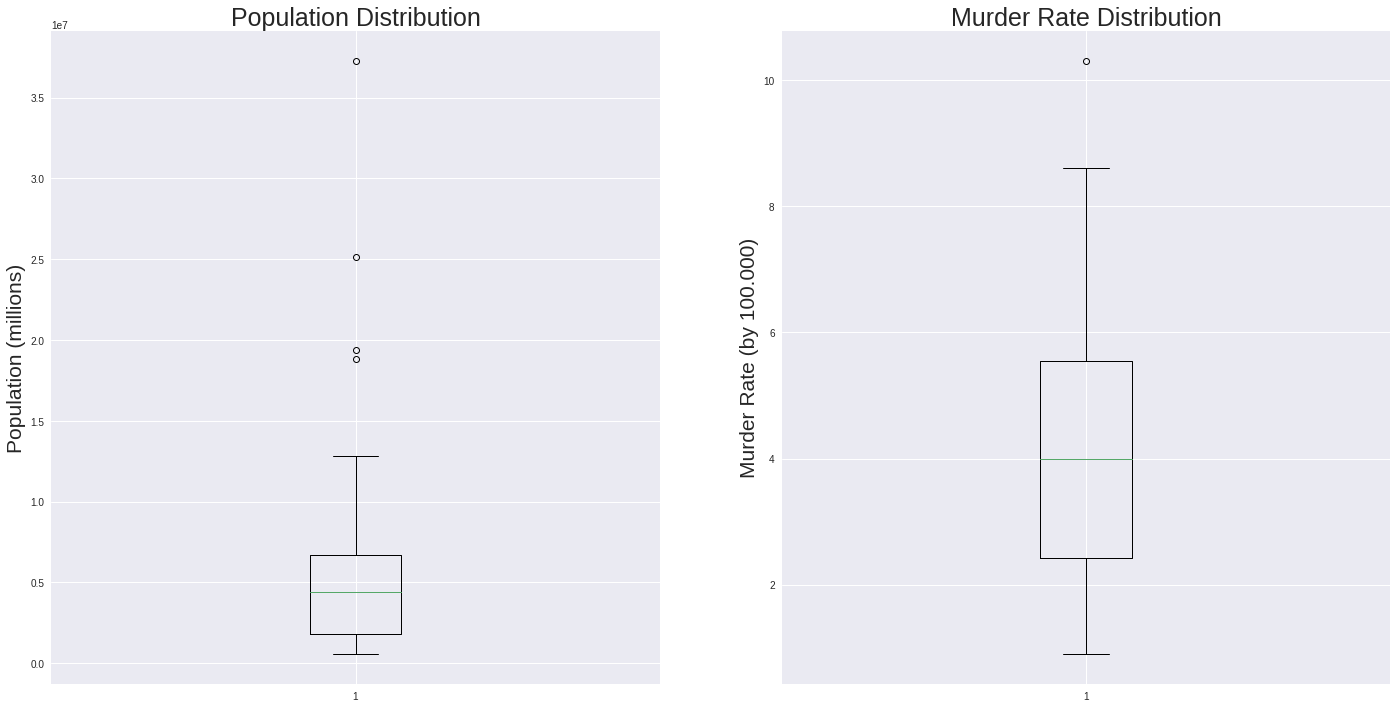

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].boxplot(data['Population'])
ax[1].boxplot(data['Murder.Rate'])

ax[0].set_ylabel('Population (millions)', size=21)
ax[1].set_ylabel('Murder Rate (by 100.000)', size=21)
ax[0].set_title('Population Distribution', size=25)
ax[1].set_title('Murder Rate Distribution', size=25)

plt.show()

### Frequency Tables

#### *Population*

In [12]:
bins = pd.cut(data['Population'], 10)

df_freq = pd.merge(data, bins, how='inner', left_index=True, right_index=True)
df_freq.rename(columns={'Population_y':'Interval'}, inplace=True)
df_freq.groupby('Interval').agg({'Interval': 'count', 'Abbreviation': ' '.join}).rename(columns={'Interval':'Frequência', 'Abbreviation':'Lista de UFs'})

,Frequência,Lista de UFs
Interval,,
"(526935.67, 4232659.0]",24,AK AR CT DE HI ID IA KS ME MS MT NE NV NH NM N...
"(4232659.0, 7901692.0]",14,AL AZ CO IN KY LA MD MA MN MO SC TN WA WI
"(7901692.0, 11570725.0]",6,GA MI NJ NC OH VA
"(11570725.0, 15239758.0]",2,IL PA
"(15239758.0, 18908791.0]",1,FL
"(18908791.0, 22577824.0]",1,NY
"(22577824.0, 26246857.0]",1,TX
"(26246857.0, 29915890.0]",0,
"(29915890.0, 33584923.0]",0,


#### *Murder Rate*

In [13]:
bins = pd.cut(data['Murder.Rate'], 10)

df_freq = pd.merge(data, bins, how='inner', left_index=True, right_index=True)
df_freq.rename(columns={'Murder.Rate_y':'Interval'}, inplace=True)
df_freq.groupby('Interval').agg({'Interval': 'count', 'Abbreviation': ' '.join}).rename(columns={'Interval':'Frequência', 'Abbreviation':'Lista de UFs'})

,Frequência,Lista de UFs
Interval,,
"(0.891, 1.84]",5,HI ME MN NH VT
"(1.84, 2.78]",10,CT ID IA MA OR RI SD UT WA WY
"(2.78, 3.72]",8,CO KS KY MT NE NY ND WI
"(3.72, 4.66]",7,CA NJ OH OK TX VA WV
"(4.66, 5.6]",9,AK AZ AR IL IN MI NM NC PA
"(5.6, 6.54]",8,AL DE FL GA MD NV SC TN
"(6.54, 7.48]",1,MO
"(7.48, 8.42]",0,
"(8.42, 9.36]",1,MS


### Histograms

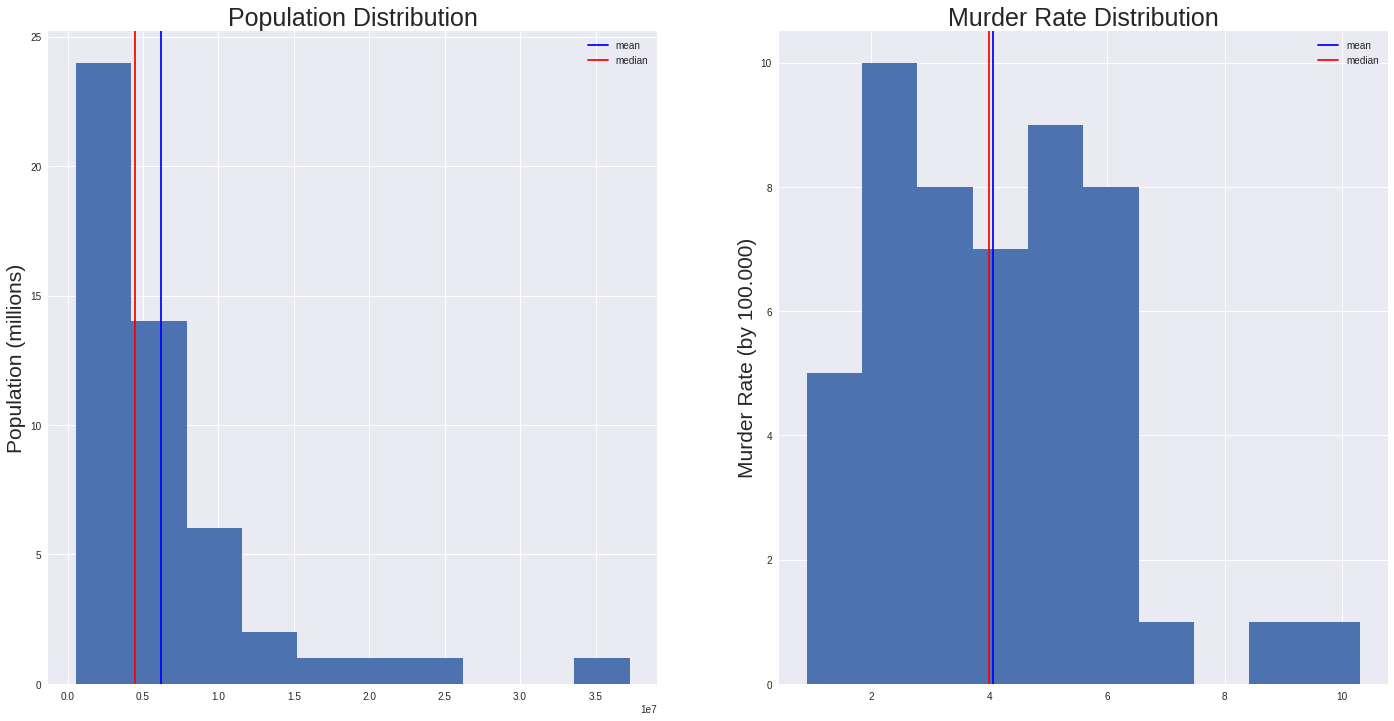

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].hist(data['Population'])

ax[0].set_title('Population Distribution', size=25)
ax[0].set_ylabel('Population (millions)', size=21)
ax[0].axvline(np.mean(data['Population']), 0, 1.6, color='b', label='mean')
ax[0].axvline(np.median(data['Population']), 0, 1.6, color='r', label='median')

ax[1].hist(data['Murder.Rate'])

ax[1].set_title('Murder Rate Distribution', size=25)
ax[1].set_ylabel('Murder Rate (by 100.000)', size=21)
ax[1].axvline(np.mean(data['Murder.Rate']), 0, 1.6, color='b', label='mean')
ax[1].axvline(np.median(data['Murder.Rate']), 0, 1.6, color='r', label='median')

ax[0].legend()
ax[1].legend()
plt.show()

### Scatter Plots

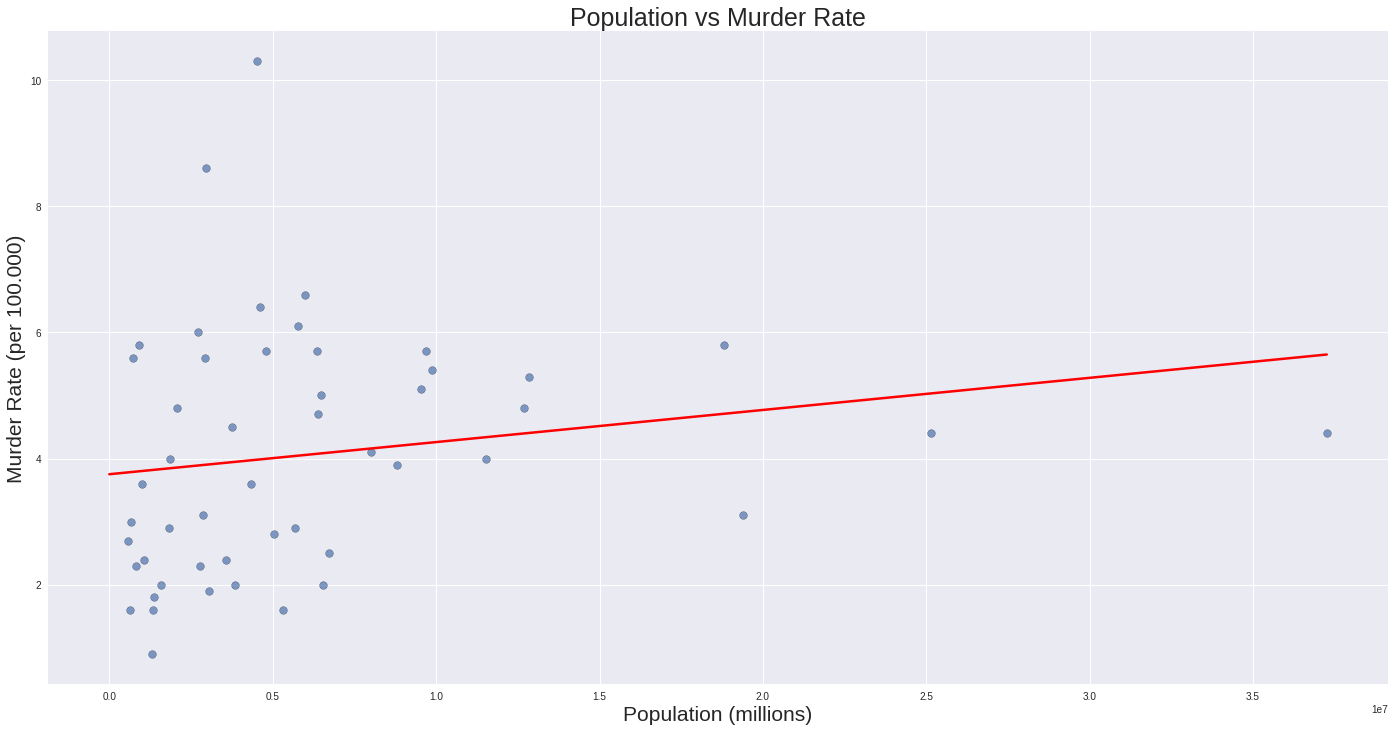

In [15]:
fig, ax = plt.subplots()

ax.scatter(data['Population'], data['Murder.Rate'], s=60, alpha=0.7, edgecolors="k")

# plotting regression line
b, a = np.polyfit(data['Population'], data['Murder.Rate'], deg=1)
xseq = np.linspace(0, data['Population'].max(), num=data['Population'].shape[0])

ax.plot(xseq, a + b * xseq, color="r", lw=2.5)

ax.set_title('Population vs Murder Rate', size=25)
ax.set_xlabel('Population (millions)', size=21)
ax.set_ylabel('Murder Rate (per 100.000)', size=21)

plt.show()

## Binary and Categorical Data

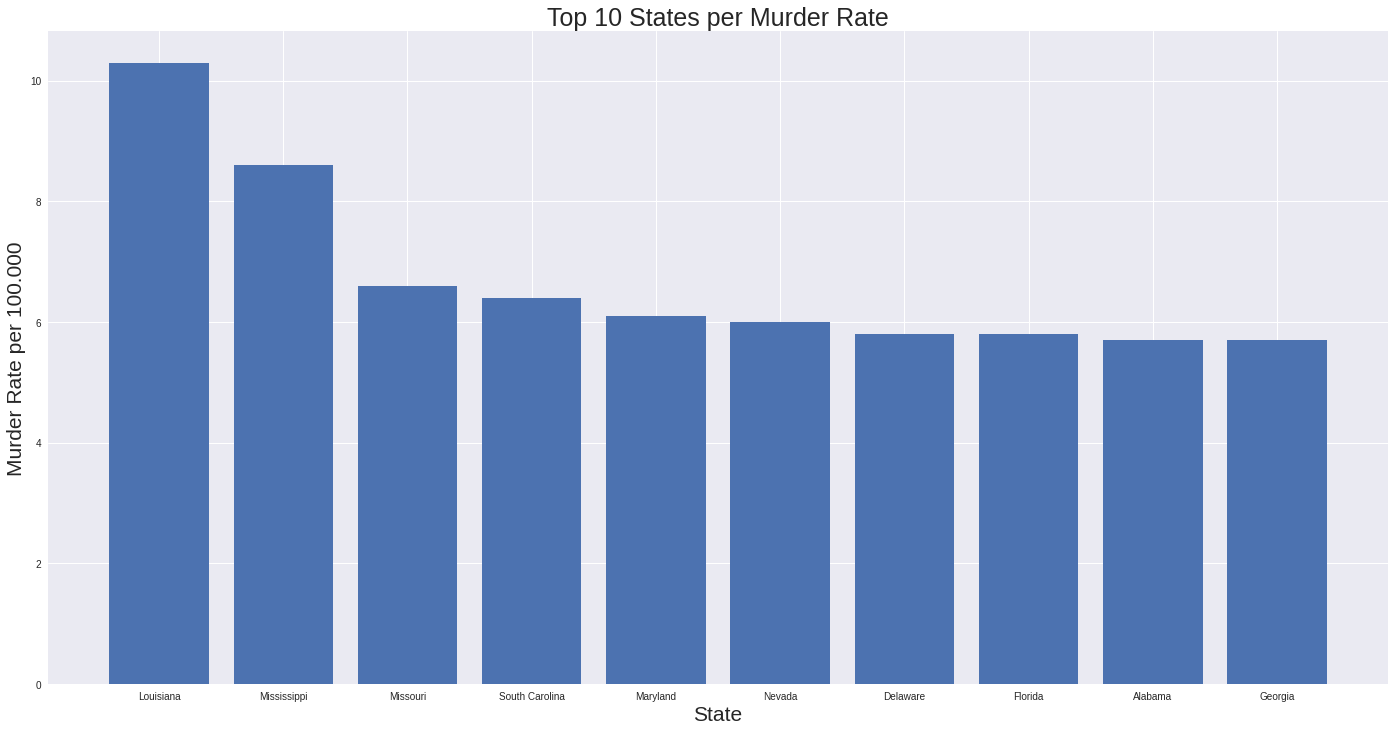

In [27]:
df2 = data.groupby('State').agg({'Murder.Rate': 'mean'}).sort_values(by='Murder.Rate', ascending=False)[:10]

fig, ax = plt.subplots()

ax.bar(df2.index, df2['Murder.Rate'])
ax.set_title('Top 10 States per Murder Rate', size=25)
ax.set_xlabel('State', fontsize=21)
ax.set_ylabel('Murder Rate per 100.000', fontsize=21)

plt.show()

## Multivariate Analysis

### Correlation

<AxesSubplot:>

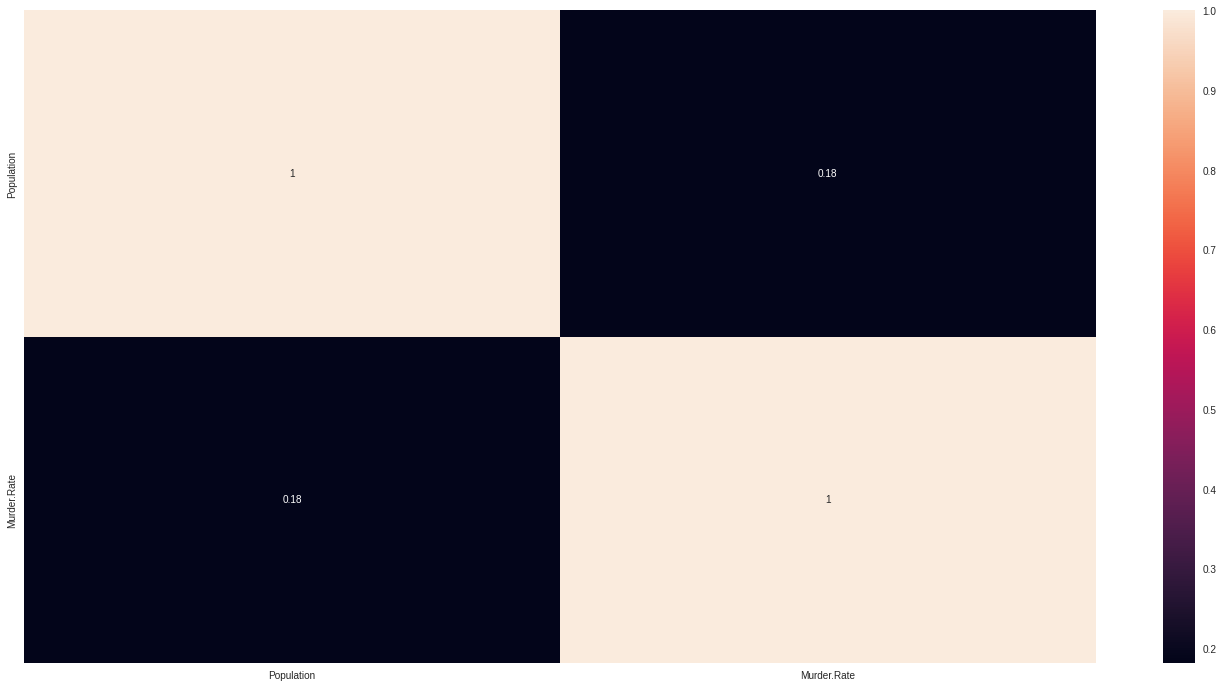

In [17]:
corr = data.corr(method='pearson')
sns.heatmap(corr, annot=True)